In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import eda
import random as random
from os.path import join as pjoin

from utils import utils
#from utils import knn_validation
#from utils import knn_cross_validation
#from utils import nearest_prototypes

DATA_DIR = './data/'

In [2]:
def load_data():
    ## 0. To obtain reproducible results, we set the random seeds
    random.seed(2020)
    np.random.seed(2020)
    ## 1. Load training set

    dataset_file = pjoin(DATA_DIR, 'adult.data')
    testset_file = pjoin(DATA_DIR, 'adult.test')

    train = pd.read_csv(dataset_file, header=None, delimiter=r",\s+", engine='python')
    train.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    #train_samples = train.drop(columns="Income")
    #train_labels = train.Income
    #train.info()
    
    test = pd.read_csv(testset_file, header=None, delimiter=r",\s+", engine='python')
    test.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    
    #test_samples = test.drop(columns="Income")
    #test_labels = test.Income
    
    return train, test

In [3]:
from sklearn.preprocessing import PolynomialFeatures
def data_preprocess(data,is_train):
    data = eda.NativeCountry_replace(data)
    data = eda.WorkClass_replace(data)
    data = eda.Occupation_replace(data)
    data = eda.Education_remove(data)
    data = eda.Capital_merge(data)
    #train_samples, train_labels, weight = get_X_y(train)#drop also weights
    #data = eda.NativeCountry_classify(data)
    
    
    #without PCA
    data_samples = data.drop(columns="Income")
    
    data_labels = data.Income.map({"<=50K": 0, ">50K": 1})
    if is_train == False:
        data_labels = data.Income.map({"<=50K.": 0, ">50K.": 1})
        
    data_samples = eda.X_to_dummy(data_samples, None)
    print(data_samples.info())
    data_samples = data_samples.to_numpy()
    #data_samples = eda.standardization(data_samples)
    
    
    """
    #with PCA
    
    data_samples, data_labels, weight = eda.get_X_y(data,is_train)
    #print(len(weight))
    data_samples = eda.X_to_dummy(data_samples, None)
    print(data_samples.info())
    data_samples = data_samples.to_numpy()
    data_samples = eda.standardization(data_samples)
    data_samples, _ = eda.PCA_with_weight(data_samples,weight) 
    """
    
    poly = PolynomialFeatures(degree=2)
    data_samples = poly.fit_transform(data_samples)
    return data_samples,data_labels

In [4]:
def preprocess(train,test):
    print("preprocessing training set")
    train_samples, train_labels = data_preprocess(train,True)
    
    print("preprocessing test set")
    test_samples, test_labels = data_preprocess(test,False)
    
    print("number of variables")
    print(len(train_samples[0]))
    print('done')
    return train_samples, train_labels, test_samples, test_labels

In [5]:
train, test = load_data()

In [6]:
train.head(10)

Age         WorkClass  fnlwgt  Education  EducationNum  \
0   39         State-gov   77516  Bachelors            13   
1   50  Self-emp-not-inc   83311  Bachelors            13   
2   38           Private  215646    HS-grad             9   
3   53           Private  234721       11th             7   
4   28           Private  338409  Bachelors            13   
5   37           Private  284582    Masters            14   
6   49           Private  160187        9th             5   
7   52  Self-emp-not-inc  209642    HS-grad             9   
8   31           Private   45781    Masters            14   
9   42           Private  159449  Bachelors            13   

           MaritalStatus         Occupation   Relationship   Race  Gender  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry Income  
0         2174            0            40  United-States  <=50K  
1            0            0            13  United-States  <=50K  
2            0            0            40  United-States  <=50K  
3            0            0            40  United-States  <=50K  
4            0            0            40           Cuba  <=50K  
5            0            0            40  United-States  <=50K  
6            0            0            16        Jamaica  <=50K  
7            0            0            45  United-States   >50K  
8        14084            0            50  United-States   >50K  
9         5178            0            40  United-States   >50K

In [7]:
train_samples, train_labels, test_samples, test_labels = preprocess(train,test)

preprocessing training set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 87 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Age                                       32561 non-null  int64
 1   fnlwgt                                    32561 non-null  int64
 2   EducationNum                              32561 non-null  int64
 3   HoursPerWeek                              32561 non-null  int64
 4   CapitalChange                             32561 non-null  int64
 5   WorkClass_Federal-gov                     32561 non-null  uint8
 6   WorkClass_Local-gov                       32561 non-null  uint8
 7   WorkClass_Not-inc                         32561 non-null  uint8
 8   WorkClass_Private                         32561 non-null  uint8
 9   WorkClass_Self-emp-inc                    32561 non-null  uint8
 10  WorkClass_State-gov            

number of variables
3916
done


In [14]:
print(len(train_samples[0]))

1176


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, make_scorer

def tune_pipe_LR(x_train,y_train,plot=True):
    print('tuning pipe...') 
    
    matthews = make_scorer(matthews_corrcoef)
    
    class_weight = [None,'balanced']
    #penalty = ['none','l2']
    C = np.geomspace(0.001, 100, 20)
    
    LR = LogisticRegression(random_state=2020)
    
    tuned_parameters =  {"class_weight": class_weight,
                         #"penalty": penalty,
                         "C":C
                        }
    stratified_kfold = StratifiedKFold(n_splits=5,random_state=2020, shuffle=True)
    
    CV = GridSearchCV(LR, tuned_parameters,return_train_score=True,
                    cv=stratified_kfold,
                    scoring=matthews,
                    verbose=4)
    
    
    CV.fit(x_train, y_train)
    print(CV.best_params_)
    
    df = pd.DataFrame(
        (
            dict(class_weight=d["class_weight"],C = d["C"], error=e, std=s)
            for d, e, s in zip(
                CV.cv_results_["params"],
                CV.cv_results_["mean_test_score"],
                CV.cv_results_["std_test_score"],
            )
        )
    )
    
    #plt.errorbar(n/df["C"], df["error"], yerr=df["std"])
    #plt.xscale("log")
    #plt.show()
    
    print('done')
    KNN = LogisticRegression(class_weight = CV.best_params_['class_weight'], C = CV.best_params_['C'],random_state=2020)
    return KNN,df

In [16]:
pipe,result = tune_pipe_LR(train_samples,train_labels)

tuning pipe...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.001, class_weight=None ......................................
[CV]  C=0.001, class_weight=None, score=0.3490798850773147, total=   2.4s
[CV] C=0.001, class_weight=None ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  C=0.001, class_weight=None, score=0.33733194758245266, total=   1.0s
[CV] C=0.001, class_weight=None ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  C=0.001, class_weight=None, score=0.3449018254402224, total=   0.9s
[CV] C=0.001, class_weight=None ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


[CV]  C=0.001, class_weight=None, score=0.36565455453335693, total=   0.8s
[CV] C=0.001, class_weight=None ......................................
[CV]  C=0.001, class_weight=None, score=0.334014749106373, total=   0.8s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.5366220038617298, total=   2.3s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.5276829874410518, total=   2.2s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.5569785847694526, total=   3.5s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.5868835168624015, total=   2.6s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.5438073702836953, total=   2.0s
[CV] C=0.0018329807108324356, class_

[CV]  C=0.02069138081114789, class_weight=balanced, score=0.5079326213829338, total=   2.2s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.5279943891963511, total=   2.5s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.5738654509048785, total=   2.5s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.5676029431298393, total=   2.0s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.5402462303704294, total=   2.4s
[CV] C=0.0379269019073225, class_weight=None .........................
[CV]  C=0.0379269019073225, class_weight=None, score=0.3490798850773147, total=   0.9s
[CV] C=0.0379269019073225, class_weight=None .........................
[CV]  C=0.0379269019073225,

[CV]  C=0.42813323987193913, class_weight=balanced, score=0.4954595881437636, total=   2.5s
[CV] C=0.42813323987193913, class_weight=balanced ....................
[CV]  C=0.42813323987193913, class_weight=balanced, score=0.5634493570794428, total=   2.9s
[CV] C=0.42813323987193913, class_weight=balanced ....................
[CV]  C=0.42813323987193913, class_weight=balanced, score=0.5328029160019389, total=   2.4s
[CV] C=0.42813323987193913, class_weight=balanced ....................
[CV]  C=0.42813323987193913, class_weight=balanced, score=0.5383799691390216, total=   2.0s
[CV] C=0.7847599703514607, class_weight=None .........................
[CV]  C=0.7847599703514607, class_weight=None, score=0.3501116593272655, total=   0.8s
[CV] C=0.7847599703514607, class_weight=None .........................
[CV]  C=0.7847599703514607, class_weight=None, score=0.33733194758245266, total=   0.9s
[CV] C=0.7847599703514607, class_weight=None .........................
[CV]  C=0.7847599703514607, cla

[CV]  C=8.858667904100823, class_weight=balanced, score=0.5661872189193514, total=   3.0s
[CV] C=8.858667904100823, class_weight=balanced ......................
[CV]  C=8.858667904100823, class_weight=balanced, score=0.506656036124765, total=   2.0s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.3501116593272655, total=   0.8s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.33733194758245266, total=   0.9s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.3449018254402224, total=   0.8s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.36565455453335693, total=   0.9s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, sco

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.2min finished


{'C': 0.23357214690901212, 'class_weight': 'balanced'}
done


In [17]:
print(result.sort_values(by=['error'],ascending=False))

   class_weight           C     error       std
19     balanced    0.233572  0.552979  0.008051
7      balanced    0.006158  0.552544  0.018112
5      balanced    0.003360  0.552185  0.018479
29     balanced    4.832930  0.551648  0.021380
23     balanced    0.784760  0.551161  0.029960
1      balanced    0.001000  0.550394  0.020609
17     balanced    0.127427  0.550244  0.014134
13     balanced    0.037927  0.548730  0.013721
35     balanced   29.763514  0.543968  0.029364
39     balanced  100.000000  0.543773  0.025967
37     balanced   54.555948  0.543592  0.026010
11     balanced    0.020691  0.543527  0.024573
15     balanced    0.069519  0.543400  0.010202
33     balanced   16.237767  0.542478  0.007385
9      balanced    0.011288  0.541912  0.033348
25     balanced    1.438450  0.541709  0.019440
27     balanced    2.636651  0.539956  0.024731
21     balanced    0.428133  0.535323  0.022455
31     balanced    8.858668  0.533330  0.028792
3      balanced    0.001833  0.522431  0

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 1 1 ... 1 1 1]


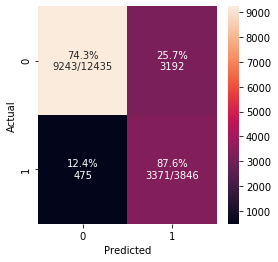

0.7747681346354647


In [19]:
pipe.fit(train_samples,train_labels)
import utils.analysing as AN
from sklearn.metrics import accuracy_score
pred = pipe.predict(test_samples)
#print(accuracy_score(test_labels,pred))
AN.plot_confusion_matrix(test_labels,pred)
print(accuracy_score(test_labels,pred))